Validación datos corrupción
--------------------------

In [1]:
# importacion librerias
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Conteo_de_Procesos_2023-07-18.csv")

In [3]:
df_corrupcion = df[df.GRUPO_DELITO == 'CORRUPCION ADMINISTRATIVA']

**Cantidad de procesos**

In [4]:
cantidad_procesos = df_corrupcion['TOTAL_PROCESOS'].sum()

print("Cantidad de procesos:", cantidad_procesos)

Cantidad de procesos: 93366


**Procesos por estado**

In [5]:
df_estado = df_corrupcion.groupby(by = 'ESTADO_NOTICIA').TOTAL_PROCESOS.sum() 
df_estado = df_estado.to_frame()

# obtener porcentajes
df_estado["PORCENTAJE"] = (df_estado['TOTAL_PROCESOS'] / df_estado['TOTAL_PROCESOS'].sum()) * 100
df_estado['PORCENTAJE'] = df_estado['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_estado

TOTAL_PROCESOS PORCENTAJE
ESTADO_NOTICIA                           
ACTIVO                   48012        51%
INACTIVO                 45354        49%

**Procesos por ATIPICIDAD o INEXISTENCIA y CONEXOS**

In [6]:
df_atipicidad = df_corrupcion[df_corrupcion.ATIPICIDAD_INEXISTENCIA == 'SI']
cantidad_atipicidad = df_atipicidad['TOTAL_PROCESOS'].sum()

porcentaje = cantidad_atipicidad/cantidad_procesos
porcentaje = int(porcentaje*100)

print("Cantidad de procesos ATIPICIDAD_INEXISTENCIA:", cantidad_atipicidad)
print("Porcentaje de procesos ATIPICIDAD_INEXISTENCIA:", porcentaje, "%")


Cantidad de procesos ATIPICIDAD_INEXISTENCIA: 25856
Porcentaje de procesos ATIPICIDAD_INEXISTENCIA: 27 %


In [7]:
df_conexo = df_corrupcion[df_corrupcion.CONEXO == 'SI']
cantidad_conexos = df_conexo['TOTAL_PROCESOS'].sum()

porcentaje = cantidad_conexos/cantidad_procesos
porcentaje = int(porcentaje*100)

print("Cantidad de procesos CONEXOS:", cantidad_conexos)
print("Porcentaje de procesos CONEXOS:", porcentaje, "%")

Cantidad de procesos CONEXOS: 5423
Porcentaje de procesos CONEXOS: 5 %


Procesos por ATIPICIDAD o INEXISTENCIA por estado y por etapa:

In [8]:
df_estado_atipicidad = df_atipicidad.groupby(by = ['ESTADO_NOTICIA', 'ETAPA']).TOTAL_PROCESOS.sum() 
df_estado_atipicidad = df_estado_atipicidad.to_frame()
df_estado_atipicidad

TOTAL_PROCESOS
ESTADO_NOTICIA ETAPA                                 
ACTIVO         INDAGACIÓN                           5
INACTIVO       EJECUCIÓN DE PENAS                   3
               INDAGACIÓN                       25214
               INVESTIGACIÓN                      281
               JUICIO                             191
               QUERELLABLE                        157
               TERMINACIÓN ANTICIPADA               5

**Procesos por estado y por etapa**

In [9]:
df_etapa = df_corrupcion.groupby(by = ['ESTADO_NOTICIA', 'ETAPA']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()
df_etapa

TOTAL_PROCESOS
ESTADO_NOTICIA ETAPA                                            
ACTIVO         EJECUCIÓN DE PENAS                            147
               ETAPA DE INSTRUCCION                            1
               INDAGACIÓN                                  40236
               INVESTIGACIÓN                                1441
               JUICIO                                       6041
               QUERELLABLE                                   103
               TERMINACIÓN ANTICIPADA                         43
INACTIVO       EJECUCIÓN DE PENAS                           4226
               ETAPA DE INSTRUCCION                            1
               ETAPA DE INVESTIGACION PRELIMINAR             206
               INDAGACIÓN                                  36855
               INVESTIGACIÓN                                 916
               JUICIO                                       2847
               QUERELLABLE                                   273
               TERMINACIÓN ANTICIPADA                         29

**Procesos a analizar**

In [10]:
df_corrupcion = df_corrupcion[df_corrupcion.ATIPICIDAD_INEXISTENCIA == 'NO']
df_corrupcion = df_corrupcion[df_corrupcion.CONEXO == 'NO']

cantidad_trabajar = df_corrupcion['TOTAL_PROCESOS'].sum()

print("Cantidad de procesos a analisar:", cantidad_trabajar)

Cantidad de procesos a analisar: 62087


**Procesos inactivos**

In [11]:
df_inactivo = df_corrupcion[df_corrupcion.ESTADO_NOTICIA == 'INACTIVO']
cantidad_inactivos = df_inactivo['TOTAL_PROCESOS'].sum()

porcentaje = cantidad_inactivos/cantidad_trabajar
porcentaje = int(porcentaje*100)

print("Cantidad de procesos inactivos:", cantidad_inactivos)
print("Porcentaje de procesos inactivos:", porcentaje, "%")

Cantidad de procesos inactivos: 14080
Porcentaje de procesos inactivos: 22 %


**Inactivos Imputacion** 

In [12]:
df_etapa = df_inactivo.groupby(by = ['IMPUTACION']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
IMPUTACION                           
NO                    7315        52%
SI                    6765        48%

**Inactivos Condena**

In [13]:
df_etapa = df_inactivo.groupby(by = ['CONDENA']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
CONDENA                           
NO                 9877        70%
SI                 4203        30%

**Inactivos Acusación**

In [14]:
df_etapa = df_inactivo.groupby(by = ['ACUSACION']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
ACUSACION                           
NO                   8568        61%
SI                   5512        39%

**Inactivos capturas**

In [15]:
df_etapa = df_inactivo.groupby(by = ['CAPTURA']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
CAPTURA                           
NO                10048        71%
SI                 4032        29%

**Procesos activos**

In [16]:
df_activo = df_corrupcion[df_corrupcion.ESTADO_NOTICIA == 'ACTIVO']
cantidad_activos = df_activo['TOTAL_PROCESOS'].sum()

porcentaje = cantidad_activos/cantidad_trabajar
porcentaje = int(porcentaje*100)

print("Cantidad de procesos activos:", cantidad_activos)
print("Porcentaje de procesos activos:", porcentaje, "%")

Cantidad de procesos activos: 48007
Porcentaje de procesos activos: 77 %


**Activos Imputación**

In [17]:
df_etapa = df_activo.groupby(by = ['IMPUTACION']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
IMPUTACION                           
NO                   40269        84%
SI                    7738        16%

**Activos Condenas**

In [18]:
df_etapa = df_activo.groupby(by = ['CONDENA']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
CONDENA                           
NO                47581        99%
SI                  426         1%

**Activos Acusación**

In [19]:
df_etapa = df_activo.groupby(by = ['ACUSACION']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
ACUSACION                           
NO                  42789        89%
SI                   5218        11%

**Activos Captura**

In [20]:
df_etapa = df_activo.groupby(by = ['CAPTURA']).TOTAL_PROCESOS.sum()
df_etapa = df_etapa.to_frame()

# obtener porcentajes
df_etapa["PORCENTAJE"] = (df_etapa['TOTAL_PROCESOS'] / df_etapa['TOTAL_PROCESOS'].sum()) * 100
df_etapa['PORCENTAJE'] = df_etapa['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_etapa

TOTAL_PROCESOS PORCENTAJE
CAPTURA                           
NO                44378        92%
SI                 3629         8%

**Imputaciones**

In [21]:
df_imputacion = df_corrupcion.groupby(by = ['IMPUTACION']).TOTAL_PROCESOS.sum()
df_imputacion = df_imputacion.to_frame()

# obtener porcentajes
df_imputacion["PORCENTAJE"] = (df_imputacion['TOTAL_PROCESOS'] / df_imputacion['TOTAL_PROCESOS'].sum()) * 100
df_imputacion['PORCENTAJE'] = df_imputacion['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_imputacion

TOTAL_PROCESOS PORCENTAJE
IMPUTACION                           
NO                   47584        77%
SI                   14503        23%

**Condenas**

In [22]:
df_condena = df_corrupcion.groupby(by = ['CONDENA']).TOTAL_PROCESOS.sum()
df_condena = df_condena.to_frame()

# obtener porcentajes
df_condena["PORCENTAJE"] = (df_condena['TOTAL_PROCESOS'] / df_condena['TOTAL_PROCESOS'].sum()) * 100
df_condena['PORCENTAJE'] = df_condena['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_condena

TOTAL_PROCESOS PORCENTAJE
CONDENA                           
NO                57458        93%
SI                 4629         7%

**Acusación**

In [23]:
df_acusacion = df_corrupcion.groupby(by = ['ACUSACION']).TOTAL_PROCESOS.sum()
df_acusacion = df_acusacion.to_frame()

# obtener porcentajes
df_acusacion["PORCENTAJE"] = (df_acusacion['TOTAL_PROCESOS'] / df_acusacion['TOTAL_PROCESOS'].sum()) * 100
df_acusacion['PORCENTAJE'] = df_acusacion['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_acusacion

TOTAL_PROCESOS PORCENTAJE
ACUSACION                           
NO                  51357        83%
SI                  10730        17%

**Capturas**

In [24]:
df_captura = df_corrupcion.groupby(by = ['CAPTURA']).TOTAL_PROCESOS.sum()
df_captura = df_captura.to_frame()

# obtener porcentajes
df_captura["PORCENTAJE"] = (df_captura['TOTAL_PROCESOS'] / df_captura['TOTAL_PROCESOS'].sum()) * 100
df_captura['PORCENTAJE'] = df_captura['PORCENTAJE'].apply(lambda x: "{0:.0f}%".format(x))

df_captura

TOTAL_PROCESOS PORCENTAJE
CAPTURA                           
NO                54426        88%
SI                 7661        12%

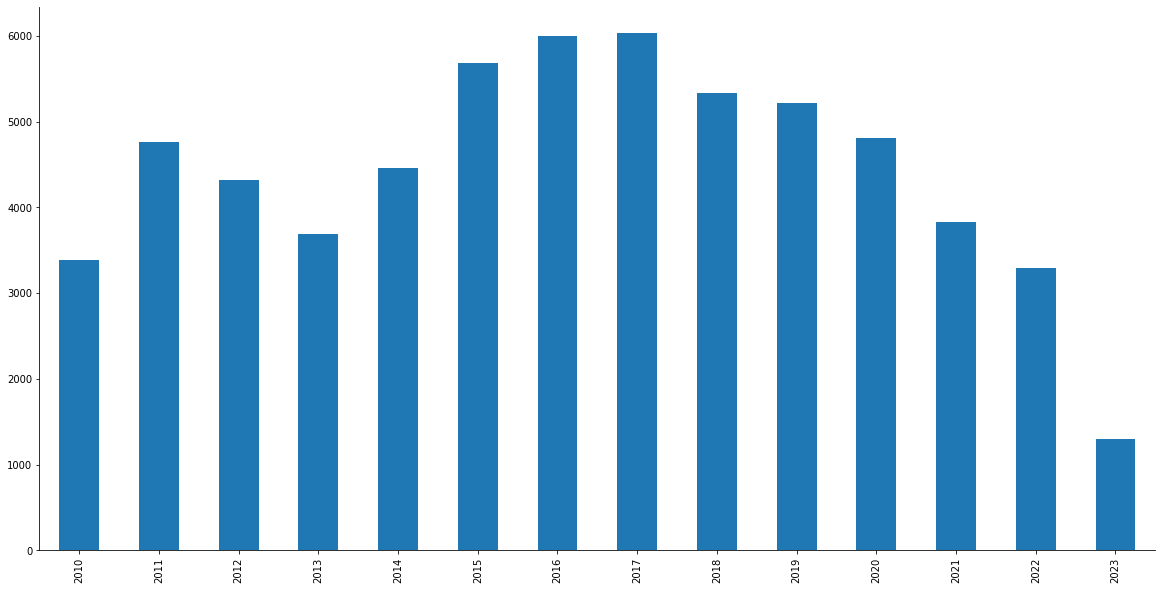

In [25]:
df_annio = df_corrupcion.groupby(by = ['ANIO_HECHO']).TOTAL_PROCESOS.sum()

plot_annios = df_annio.plot.bar(x='ANIO_HECHO', y='TOTAL_PROCESOS', rot=90, 
                               legend=False, xlabel='', figsize=(20, 10))

plot_annios.spines['top'].set_visible(False)
plot_annios.spines['right'].set_visible(False)
#plot_annios.spines['left'].set_visible(False)
#plot_annios.spines['bottom'].set_visible(False)



In [26]:
df_annio

ANIO_HECHO
2010    3387
2011    4756
2012    4315
2013    3686
2014    4459
2015    5681
2016    5997
2017    6036
2018    5334
2019    5218
2020    4807
2021    3824
2022    3289
2023    1298
Name: TOTAL_PROCESOS, dtype: int64

In [27]:
df_corrupcion
df_corrupcion.columns

Index(['HECHO', 'RUPTURA', 'CONEXO', 'ESTADO_NOTICIA', 'ETAPA',
       'ANIO_DENUNCIA', 'ANIO_ENTRADA', 'ANIO_HECHO', 'LEY', 'PAIS',
       'DEPARTAMENTO', 'MUNICIPIO', 'SECCIONAL', 'GRUPO_DELITO', 'DELITO',
       'CAPTURA', 'IMPUTACION', 'CONDENA', 'ATIPICIDAD_INEXISTENCIA',
       'ACUSACION', 'HOMICIDIO_DOLOSO_CONSUMADO', 'TOTAL_PROCESOS'],
      dtype='object')

In [28]:
df_acusacion = df_corrupcion.groupby(by = ['ESTADO_NOTICIA','CONEXO']).TOTAL_PROCESOS.sum()
df_acusacion = df_acusacion.to_frame()
df_acusacion

TOTAL_PROCESOS
ESTADO_NOTICIA CONEXO                
ACTIVO         NO               48007
INACTIVO       NO               14080